In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Import ny income file
demog_df = pd.read_csv('https://raw.githubusercontent.com/tawney-kirkland/Metis_Project_1/main/data/ny_income.csv',
                      usecols = ['GeoType', 'GeogName', 'GeoID', 'Borough','Pop16plE','F16plE','LFE','HH2E',
                       'HHI75t99E','HI100t149E','HI150t199E', 'HHI200plE', 'MdHHIncE', 'MnHHIncE', 
                        'InfoE', 'FIREE', 'PrfSMgAWME','EdHlthCSAE','PubAdminE'])

In [75]:
demog_df.rename(columns = {'Pop16plE': 'above_16_pop',
                            'F16plE' : 'fem_above_16_pop',
                           'LFE' : 'labor_force',
                            'HH2E' : 'total_households',
                           'HHI75t99E' : 'income_75_99k',
                           'HI100t149E' : 'income_100_149k',
                            'HI150t199E' : 'income_150_199k',
                            'HHI200plE': 'income_200k_over',
                           'MdHHIncE': 'income_median',
                           'MnHHIncE': 'income_mean',
                            'InfoE': 'information_occ',
                            'FIREE': 'finServ_occ', 
                            'PrfSMgAWME': 'profesServ_occ',
                            'EdHlthCSAE': 'edhealth_occ',
                            'PubAdminE': 'pubAdmin_occ'},
                           
                 inplace=True
                )

In [76]:
demog_df.head()

,GeoType,GeogName,GeoID,Borough,above_16_pop,labor_force,fem_above_16_pop,information_occ,finServ_occ,profesServ_occ,edhealth_occ,pubAdmin_occ,total_households,income_75_99k,income_100_149k,income_150_199k,income_200k_over,income_median,income_mean
0,NTA2010,Bath Beach,BK27,Brooklyn,26855,16006,13703,401,1392,1482,4053,571,11428,1352,1758,706,585,58243.0,75950.0
1,NTA2010,Bay Ridge,BK31,Brooklyn,65479,42176,34372,1464,4463,5179,10126,2341,33487,4108,4827,2497,2775,63539.0,86319.0
2,NTA2010,Bedford,BK75,Brooklyn,54904,36993,29640,1688,2303,4217,9005,1062,26059,2269,2847,1195,1034,39970.0,62616.0
3,NTA2010,Bensonhurst East,BK29,Brooklyn,52857,32004,27592,580,2136,2828,7677,756,22187,2558,2416,1144,844,48097.0,65715.0
4,NTA2010,Bensonhurst West,BK28,Brooklyn,74470,45842,38579,958,3573,4223,10021,1161,29909,3428,3743,1649,1231,51035.0,70198.0


In [77]:
#Calculate the female population in each area
demog_df['fem_pop_percent'] = demog_df['fem_above_16_pop'] / demog_df['above_16_pop'] 

In [78]:
# Calculate percent in particular industries
demog_df['inform_occ_percent'] = demog_df['information_occ'] / demog_df['labor_force'] 
demog_df['finServ_occ_percent'] = demog_df['finServ_occ'] / demog_df['labor_force'] 
demog_df['profesServ_occ_percent'] = demog_df['profesServ_occ'] / demog_df['labor_force'] 
demog_df['edhealth_occ_percent'] = demog_df['edhealth_occ'] / demog_df['labor_force'] 
demog_df['pubAdmin_occ_percent'] = demog_df['pubAdmin_occ'] / demog_df['labor_force'] 

In [79]:
# Calculate the percent of households in each area within the specified income ranges
demog_df['percent_75_99k'] = demog_df['income_75_99k'] / demog_df['total_households'] 
demog_df['percent_100_149k'] = demog_df['income_100_149k'] / demog_df['total_households'] 
demog_df['percent_150_199k'] = demog_df['income_150_199k'] / demog_df['total_households']
demog_df['percent_200_over'] = demog_df['income_200k_over'] / demog_df['total_households']

# Sum percent of households with more than 100k income to determine a thresh hold
demog_df['percent_above_100k'] = demog_df['percent_100_149k'] + demog_df['percent_150_199k'] + demog_df['percent_200_over']
demog_df['percent_above_150k'] = demog_df['percent_150_199k'] + demog_df['percent_200_over']

In [96]:
demog_df.sort_values('percent_above_150k', ascending=True).head(60)

,GeoType,GeogName,GeoID,Borough,above_16_pop,labor_force,fem_above_16_pop,information_occ,finServ_occ,profesServ_occ,...,finServ_occ_percent,profesServ_occ_percent,edhealth_occ_percent,pubAdmin_occ_percent,percent_75_99k,percent_100_149k,percent_150_199k,percent_200_over,percent_above_100k,percent_above_150k
161,NTA2010,Claremont-Bathgate,BX01,The Bronx,24213,12420,13450,183,370,891,...,0.029791,0.071739,0.268519,0.031159,0.039934,0.033847,0.006179,0.000000,0.040026,0.006179
169,NTA2010,Hunts Point,BX27,The Bronx,19678,9799,10438,138,717,893,...,0.073171,0.091132,0.254210,0.013573,0.045115,0.033629,0.004381,0.004855,0.042866,0.009236
159,NTA2010,Belmont,BX06,The Bronx,22085,12311,11785,242,662,682,...,0.053773,0.055398,0.222890,0.014215,0.033567,0.056055,0.008447,0.004059,0.068561,0.012505
171,NTA2010,Longwood,BX33,The Bronx,21290,11142,11315,87,827,785,...,0.074224,0.070454,0.233351,0.019925,0.062942,0.044801,0.005088,0.007743,0.057633,0.012832
190,NTA2010,West Concourse,BX63,The Bronx,28216,17183,15148,308,881,1262,...,0.051272,0.073445,0.232788,0.027178,0.064834,0.040092,0.005346,0.007637,0.053074,0.012982
44,NTA2010,Starrett City,BK93,Brooklyn,10433,4830,6506,23,227,314,...,0.046998,0.065010,0.320290,0.159627,0.039950,0.034644,0.003745,0.009988,0.048377,0.013733
165,NTA2010,East Tremont,BX17,The Bronx,33134,18350,18478,110,932,1092,...,0.050790,0.059510,0.249973,0.020109,0.058055,0.030043,0.006969,0.006766,0.043778,0.013736
175,NTA2010,Mount Hope,BX41,The Bronx,40169,24858,21676,241,1326,1684,...,0.053343,0.067745,0.266795,0.020195,0.060636,0.030756,0.011030,0.003968,0.045754,0.014999
8,NTA2010,Brownsville,BK81,Brooklyn,45400,23474,28283,279,969,1790,...,0.041280,0.076255,0.302377,0.043921,0.059113,0.047281,0.008398,0.006774,0.062454,0.015173
168,NTA2010,Highbridge,BX26,The Bronx,28547,16788,16173,23,670,1092,...,0.039909,0.065046,0.275137,0.023171,0.080275,0.051427,0.006268,0.008987,0.066682,0.015254


In [81]:
demog_short = demog_df.drop(columns=
                            ['information_occ','finServ_occ','profesServ_occ',
                             'edhealth_occ','pubAdmin_occ','income_75_99k',
                             'income_100_149k','income_150_199k','income_200k_over',
                             'income_mean','income_median','percent_75_99k'])

In [82]:
demog_short.sort_values('percent_above_100k', ascending=False).head()

,GeoType,GeogName,GeoID,Borough,above_16_pop,labor_force,fem_above_16_pop,total_households,fem_pop_percent,inform_occ_percent,finServ_occ_percent,profesServ_occ_percent,edhealth_occ_percent,pubAdmin_occ_percent,percent_100_149k,percent_150_199k,percent_200_over,percent_above_100k,percent_above_150k
74,NTA2010,Upper East Side-Carnegie Hill,MN40,Manhattan,49438,31325,28282,28854,0.572070,0.046927,0.279745,0.223751,0.178739,0.019633,0.135510,0.099709,0.411832,0.647051,0.511541
51,NTA2010,Battery Park City-Lower Manhattan,MN25,Manhattan,39203,31640,20738,22074,0.528990,0.067193,0.273799,0.292699,0.136726,0.015992,0.200417,0.112712,0.330842,0.643970,0.443554
63,NTA2010,Lincoln Square,MN14,Manhattan,51778,36884,28597,32655,0.552300,0.079330,0.222698,0.205862,0.215405,0.019385,0.147420,0.125034,0.304088,0.576543,0.429123
71,NTA2010,SoHo-TriBeCa-Civic Center-Little Italy,MN24,Manhattan,36989,26650,18788,19700,0.507935,0.067430,0.241313,0.246529,0.134221,0.006529,0.139036,0.080609,0.355228,0.574873,0.435838
73,NTA2010,Turtle Bay-East Midtown,MN19,Manhattan,45690,34323,25152,28991,0.550492,0.065583,0.232905,0.247181,0.143869,0.037438,0.170053,0.109482,0.294574,0.574109,0.404056


In [83]:
demog_short.sort_values('inform_occ_percent', ascending=False).head()

,GeoType,GeogName,GeoID,Borough,above_16_pop,labor_force,fem_above_16_pop,total_households,fem_pop_percent,inform_occ_percent,finServ_occ_percent,profesServ_occ_percent,edhealth_occ_percent,pubAdmin_occ_percent,percent_100_149k,percent_150_199k,percent_200_over,percent_above_100k,percent_above_150k
59,NTA2010,Gramercy,MN21,Manhattan,26343,19817,14560,14167,0.552708,0.110612,0.208760,0.221779,0.155725,0.011152,0.186843,0.116468,0.265264,0.568575,0.381732
39,NTA2010,Prospect Heights,BK64,Brooklyn,17456,13431,9125,9331,0.522743,0.109374,0.082942,0.205346,0.233713,0.038716,0.190226,0.106634,0.155503,0.452363,0.262137
37,NTA2010,Park Slope-Gowanus,BK37,Brooklyn,60537,47570,31695,31147,0.523564,0.096973,0.098739,0.226676,0.224385,0.032457,0.188686,0.132051,0.239285,0.560022,0.371336
34,NTA2010,North Side-South Side,BK73,Brooklyn,45544,34166,22712,23134,0.498683,0.096148,0.084997,0.229117,0.166452,0.021278,0.153583,0.094752,0.131235,0.379571,0.225988
12,NTA2010,Carroll Gardens-Columbia Street-Red Hook,BK33,Brooklyn,34479,24935,18286,18111,0.530352,0.095127,0.095208,0.216002,0.196150,0.028314,0.149964,0.110596,0.207443,0.468003,0.318039


In [100]:
gramercy_df = demog_short[demog_short['GeogName'] == 'Gramercy']
prospectH_df = demog_short[demog_short['GeogName'] == 'Prospect Heights']
brooklynH_df = demog_short[demog_short['GeogName'] == 'Brooklyn Heights-Cobble Hill']
flushing_df = demog_short[demog_short['GeogName'] == 'Flushing']
concourse_df = demog_short[demog_short['GeogName'] == 'East Concourse-Concourse Village']
union_df = demog_short[demog_short['GeogName'] == 'Hudson Yards-Chelsea-Flat Iron-Union Square']

In [101]:
merged_df = gramercy_df.append([union_df, prospectH_df,brooklynH_df,flushing_df, concourse_df])
merged_df

,GeoType,GeogName,GeoID,Borough,above_16_pop,labor_force,fem_above_16_pop,total_households,fem_pop_percent,inform_occ_percent,finServ_occ_percent,profesServ_occ_percent,edhealth_occ_percent,pubAdmin_occ_percent,percent_100_149k,percent_150_199k,percent_200_over,percent_above_100k,percent_above_150k
59,NTA2010,Gramercy,MN21,Manhattan,26343,19817,14560,14167,0.552708,0.110612,0.208760,0.221779,0.155725,0.011152,0.186843,0.116468,0.265264,0.568575,0.381732
61,NTA2010,Hudson Yards-Chelsea-Flat Iron-Union Square,MN13,Manhattan,69699,53890,33336,42124,0.478285,0.083355,0.205084,0.223214,0.143756,0.023808,0.159695,0.099658,0.275401,0.534755,0.375059
39,NTA2010,Prospect Heights,BK64,Brooklyn,17456,13431,9125,9331,0.522743,0.109374,0.082942,0.205346,0.233713,0.038716,0.190226,0.106634,0.155503,0.452363,0.262137
7,NTA2010,Brooklyn Heights-Cobble Hill,BK09,Brooklyn,21110,14418,10684,11152,0.506111,0.092593,0.169233,0.277362,0.190110,0.026772,0.180506,0.119171,0.262285,0.561962,0.381456
97,NTA2010,Flushing,QN22,Queens,60539,34430,32723,25807,0.540528,0.012896,0.083997,0.090415,0.168109,0.016294,0.084589,0.034526,0.019801,0.138916,0.054326
164,NTA2010,East Concourse-Concourse Village,BX14,The Bronx,49034,27811,27159,22180,0.553881,0.011219,0.059689,0.078063,0.280465,0.029665,0.051262,0.009468,0.010370,0.071100,0.019838


In [150]:
mean_fem = demog_short['fem_pop_percent'].mean()
mean_info = demog_short['inform_occ_percent'].mean()
mean_above_100k = demog_short['percent_above_100k'].mean()
mean_above_100k = demog_short['percent_above_150k'].mean()

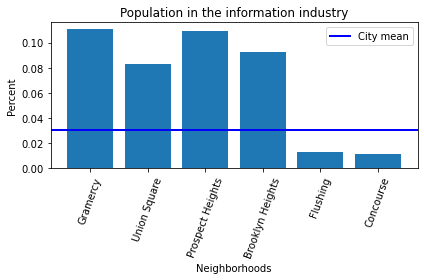

In [152]:
ticks_x = ['Gramercy', 'Union Square','Prospect Heights', 'Brooklyn Heights', 'Flushing','Concourse']
spacing = np.linspace(0,5,6)
plt.bar(merged_df['GeogName'],merged_df['inform_occ_percent'])
plt.xticks(spacing, ticks_x, rotation=70)
plt.axhline(mean_info, label= 'City mean', color = 'blue', linewidth=2)
plt.title('Population in the information industry')
plt.xlabel('Neighborhoods')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.tight_layout()
plt.show;
plt.savefig("information_ind_new.svg")

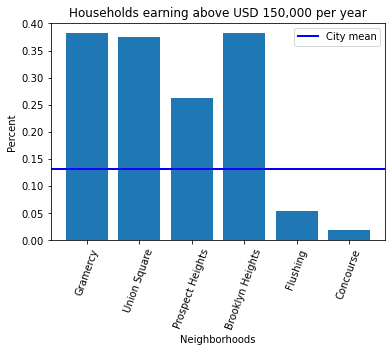

In [155]:
ticks_x2 = ['Gramercy', 'Union Square','Prospect Heights', 'Brooklyn Heights', 'Flushing','Concourse']
spacing = np.linspace(0,5,6)
plt.bar(merged_df['GeogName'],merged_df['percent_above_150k'])
plt.xticks(spacing, ticks_x, rotation=70)
plt.axhline(mean_above_150k, label= 'City mean', color = 'blue', linewidth=2)
plt.title('Households earning above USD 150,000 per year')
plt.xlabel('Neighborhoods')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.show;
plt.savefig("hhincome.svg")